# Communities and Crime Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Wczytywanie danych

In [2]:
names = !cat './dataset/communities.names' | awk 'NR>=76 && NR<=203 { print $2 }' # nazwy kolumn
informations = !cat './dataset/communities.names' | awk 'NR>=213 && NR<=340 { $1=""; $2=""; print }' # opisy kolumn
attributes = dict(zip(names, informations)) # słownik - nazwa kolumna oraz opis

In [3]:
input_data = pd.read_csv('dataset/communities.data', header=None, names=names)

In [4]:
len(input_data) # liczba wierszy

1994

In [5]:
input_data.shape # liczba wierszy oraz kolumn

(1994, 128)

## Przeglądanie danych

In [6]:
input_data.tail() # oglądamy wstępnie dane

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19
1993,6,?,?,Ontariocity,10,0.20,0.78,0.14,0.46,0.24,...,0.11,0.30,0.05,0.08,0.04,0.73,0.5,1.00,0.13,0.48


In [7]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [8]:
input_data.describe() # metoda dostarczająca statystyczne informacje o danych w kolumnach
# input_data.describe().T # transpozycja ww. tabeli

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
input_data['communityname'].value_counts().head(10)

Greenvillecity      5
Jacksonvillecity    5
Auburncity          5
Lebanoncity         4
Albanycity          4
Lafayettecity       4
Springfieldcity     4
Athenscity          4
Salemcity           4
Englewoodcity       3
Name: communityname, dtype: int64

## Typy danych w zbiorze

In [10]:
input_data.dtypes.value_counts() # wszystkie typy danych

float64    100
object      26
int64        2
dtype: int64

In [11]:
df = input_data.copy() # skopiowanie danych

In [12]:
all(isinstance(i, str) for i in df['communityname']) # sprawdzenie, czy kolumna communityname zawiera tylko stringi

True

In [13]:
cols_numeric = df.columns.drop('communityname') # wszystkie kolumny z wyjątkiem communityname
df[cols_numeric] = df[cols_numeric].apply(pd.to_numeric, errors='coerce') # konwersja wartości na liczby

In [14]:
df.dtypes.value_counts() # wszystkie typy danych

float64    125
int64        2
object       1
dtype: int64

## Zmienne jakościowe

- *state*: identyfikator stanu w USA
- *county*: identyfikator hrabstwa w USA (zawiera braki)
- *community*: identyfikator społeczności  (zawiera braki)
- *communityname*: nazwa społećznosci
- *fold*: liczba krotności w celu walidacji testów

In [15]:
# kolumny zawierające zmienne jakościowe (kategoryczne)
cols_not_predictive = !cat 'dataset/communities.names' | sed '213,340!d' | grep 'not predictive\|not counted as predictive' | awk '{print substr($2, 1, length($2)-1)}'

In [16]:
cols_not_predictive

['state', 'county', 'community', 'communityname', 'fold']

In [17]:
df = df.drop(columns=cols_not_predictive, axis=1)

In [18]:
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Sprawdzanie danych pod kątem wartości pustych

In [19]:
cols_NaN = df.columns[df.isna().any()].tolist() # kolumny zawierające nieznane wartości

In [20]:
len(cols_NaN) # liczba kolumn zawierających brakujące wartości

23

In [21]:
# Look at the features with missing values

df[cols_NaN].describe().T # sprawdzenie kolumn z brakującymi wartościami

,count,mean,std,min,25%,50%,75%,max
OtherPerCap,1993.0,0.284742,0.191008,0.0,0.17,0.25,0.360,1.0
LemasSwornFT,319.0,0.069655,0.138238,0.0,0.01,0.02,0.060,1.0
LemasSwFTPerPop,319.0,0.217461,0.159928,0.0,0.13,0.18,0.250,1.0
LemasSwFTFieldOps,319.0,0.924734,0.132249,0.0,0.93,0.97,0.980,1.0
LemasSwFTFieldPerPop,319.0,0.246332,0.155045,0.0,0.16,0.21,0.290,1.0
LemasTotalReq,319.0,0.097994,0.161927,0.0,0.02,0.04,0.085,1.0
LemasTotReqPerPop,319.0,0.215204,0.164622,0.0,0.12,0.17,0.250,1.0
PolicReqPerOffic,319.0,0.343636,0.197181,0.0,0.22,0.29,0.435,1.0
PolicPerPop,319.0,0.217492,0.159941,0.0,0.13,0.18,0.250,1.0
RacialMatchCommPol,319.0,0.689404,0.226811,0.0,0.56,0.74,0.860,1.0


In [22]:
[x + ' -' + attributes[x] for x in cols_NaN] # opis kolumn z nieznanymi wartościami

["OtherPerCap -  per capita income for people with 'other' heritage (numeric - decimal)",
 'LemasSwornFT -  number of sworn full time police officers (numeric - decimal)',
 'LemasSwFTPerPop -  sworn full time police officers per 100K population (numeric - decimal)',
 'LemasSwFTFieldOps -  number of sworn full time police officers in field operations (on the street as opposed to administrative etc) (numeric - decimal)',
 'LemasSwFTFieldPerPop -  sworn full time police officers in field operations (on the street as opposed to administrative etc) per 100K population (numeric - decimal)',
 'LemasTotalReq -  total requests for police (numeric - decimal)',
 'LemasTotReqPerPop -  total requests for police per 100K popuation (numeric - decimal)',
 'PolicReqPerOffic -  total requests for police per police officer (numeric - decimal)',
 'PolicPerPop -  police officers per 100K population (numeric - decimal)',
 'RacialMatchCommPol -  a measure of the racial match between the community and the pol

In [23]:
sum([True for idx,row in df.iterrows() if any(row.isnull())]) # zliczanie wierszy, które mają brakujące wartości

1675

In [24]:
sum(df.isnull().values.ravel()) # liczenie komórek brakujących wartości

36851

In [25]:
len(df.dropna()) # liczba wierszy niezawierajacych nieznane wartości

319

In [26]:
pd.isnull(df[cols_NaN]).sum() # liczba wierszy zawierające brakujace wartosci

OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

Kolumna **OtherPerCap** zawiera tylko jedną brakującą wartość.

In [27]:
# uzupełnienie braków w OtherPerCap średnią korzystając z Imputer z sklearn.preprocessing
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['OtherPerCap']])
df[['OtherPerCap']] = imputer.transform(df[['OtherPerCap']])

Pozostałe kolumny mają za dużo brakujących wartości, zatem je usuniemy.

In [28]:
df = df.dropna(axis=1) # usunięcie kolumn zawierających nieznane wartości

In [29]:
df.shape

(1994, 101)

In [30]:
', '.join(sorted(list(df.columns), key=lambda s: s.lower())) # nazwy kolumn

'agePct12t21, agePct12t29, agePct16t24, agePct65up, AsianPerCap, blackPerCap, FemalePctDiv, HispPerCap, householdsize, HousVacant, indianPerCap, LandArea, LemasPctOfficDrugUn, MalePctDivorce, MalePctNevMarr, medFamInc, medIncome, MedNumBR, MedOwnCostPctInc, MedOwnCostPctIncNoMtg, MedRent, MedRentPctHousInc, MedYrHousBuilt, numbUrban, NumIlleg, NumImmig, NumInShelters, NumStreet, NumUnderPov, OtherPerCap, OwnOccHiQuart, OwnOccLowQuart, OwnOccMedVal, PctBornSameState, PctBSorMore, PctEmplManu, PctEmploy, PctEmplProfServ, PctFam2Par, PctForeignBorn, PctHousLess3BR, PctHousNoPhone, PctHousOccup, PctHousOwnOcc, PctIlleg, PctImmigRec10, PctImmigRec5, PctImmigRec8, PctImmigRecent, PctKids2Par, PctLargHouseFam, PctLargHouseOccup, PctLess9thGrade, PctNotHSGrad, PctNotSpeakEnglWell, PctOccupManu, PctOccupMgmtProf, PctPersDenseHous, PctPersOwnOccup, PctPopUnderPov, PctRecentImmig, PctRecImmig10, PctRecImmig5, PctRecImmig8, PctSameCity85, PctSameHouse85, PctSameState85, PctSpeakEnglOnly, PctTeen2P

In [31]:
df.to_pickle('files/dataframe.pkl') # zapis do pliku dataframe.pkl

## Eksploracja danych

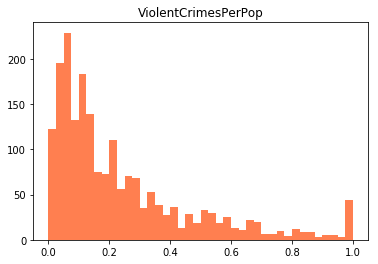

In [32]:
df.hist(column = ['ViolentCrimesPerPop'], bins = 40, color = 'coral', grid=False)
plt.show()

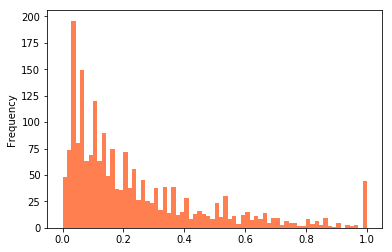

In [33]:
df.ViolentCrimesPerPop.plot(kind = 'hist', bins=70, color='coral')

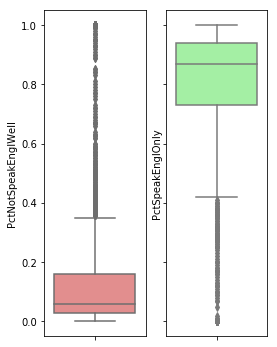

In [34]:
f, axes = plt.subplots(1, 2, figsize=(4, 6), sharex=True, sharey=True)
sns.boxplot(data=df, y='PctNotSpeakEnglWell', color='lightcoral', ax=axes[0])
sns.boxplot(data=df, y='PctSpeakEnglOnly', color='palegreen', ax=axes[1])

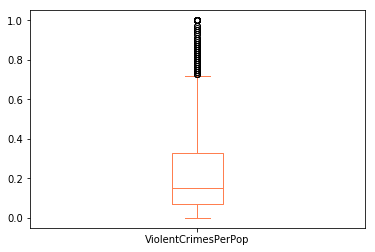

In [35]:
df.ViolentCrimesPerPop.plot.box(color="coral")

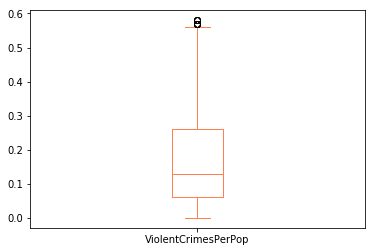

In [36]:
r_ViolentCrimesPerPop_cleared = df[df.ViolentCrimesPerPop < df.ViolentCrimesPerPop.quantile(0.9)]
r_ViolentCrimesPerPop_cleared.ViolentCrimesPerPop.plot.box(color="coral") 

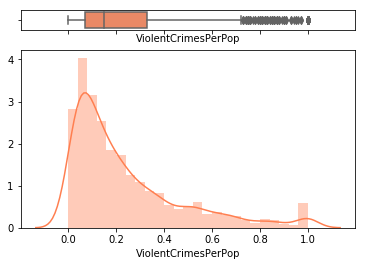

In [37]:
# gęstość liczby przestępstw kryminalnych na 100 tys. osób
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.1, .9)})
sns.boxplot(df['ViolentCrimesPerPop'], ax=ax_box, color="coral")
sns.distplot(df['ViolentCrimesPerPop'], ax=ax_hist, color="coral")


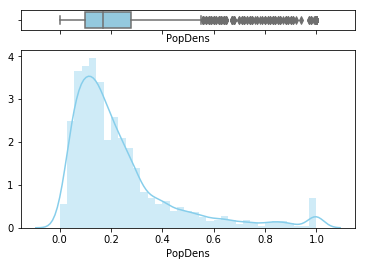

In [38]:
# gęstość zaludnienia na milę kwadratową
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.1, .9)})
sns.boxplot(df['PopDens'], ax=ax_box, color="skyblue")
sns.distplot(df['PopDens'], ax=ax_hist, color="skyblue")

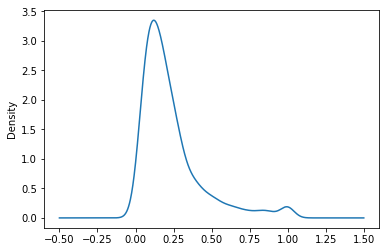

In [39]:
df.PopDens.plot.density() # gęstość zaludnienia na milę kwadratową

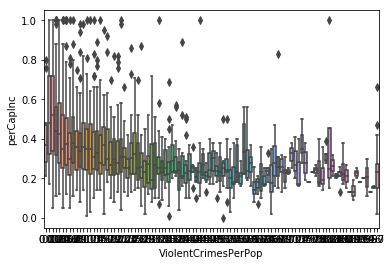

In [40]:
sns.boxplot( x=df['ViolentCrimesPerPop'], y=df['perCapInc'])

## Wizualizacja danych

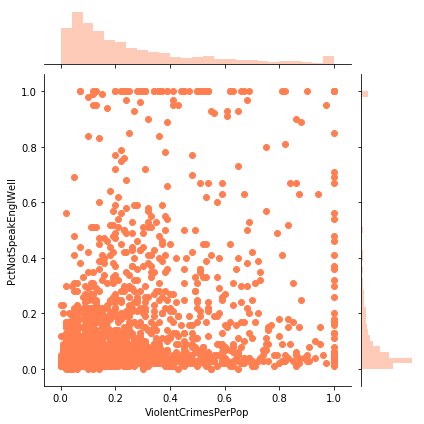

In [41]:
sns.jointplot(x = df["ViolentCrimesPerPop"], y = df["PctNotSpeakEnglWell"], color="coral")

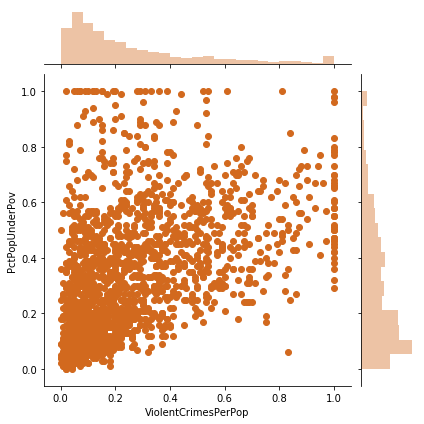

In [42]:
sns.jointplot(x = df["ViolentCrimesPerPop"], y = df["PctPopUnderPov"], color="chocolate")

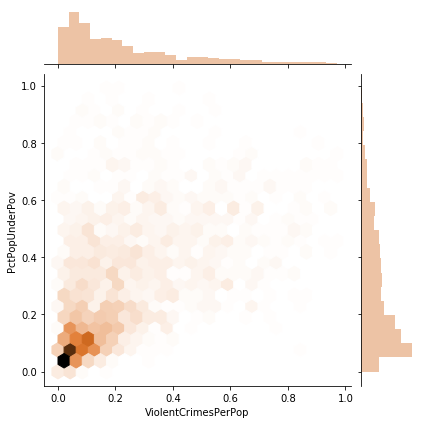

In [43]:
df_ViolentCrimesPerPop_cleared = df[df.ViolentCrimesPerPop < df.ViolentCrimesPerPop.quantile(0.99)]
df_PctPopUnderPov_cleared = df_ViolentCrimesPerPop_cleared[df_ViolentCrimesPerPop_cleared.PctPopUnderPov < df.PctPopUnderPov.quantile(0.99)]
sns.jointplot("ViolentCrimesPerPop", "PctPopUnderPov", kind = "hex", data = df_PctPopUnderPov_cleared, color="chocolate") # tak jest czytelniej

## Korelacja

In [44]:
corr = df.corr() # sprawdźmy korelację liniową cech

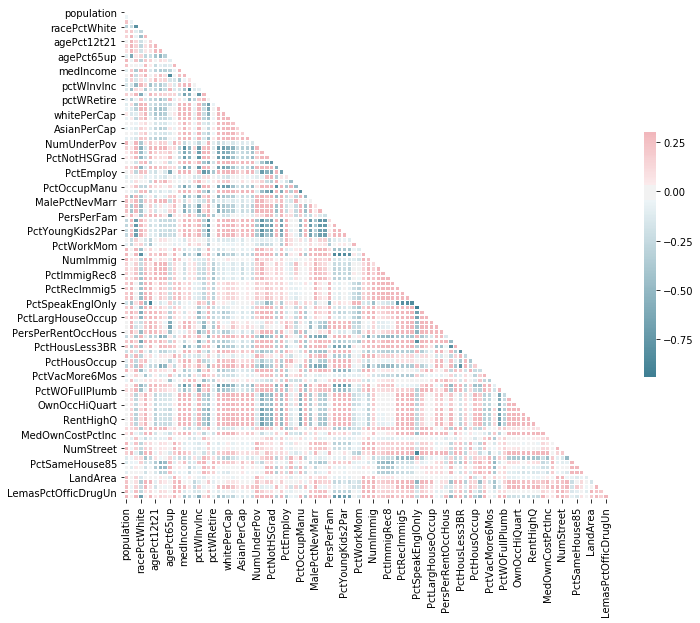

In [45]:
# do oglądania korelacji najlepiej użyć wizualizacji w postaci heatmapy

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
corr.unstack().sort_values().drop_duplicates()

PctSpeakEnglOnly  PctNotSpeakEnglWell   -0.939369
pctWWage          pctWSocSec            -0.897936
racePctHisp       PctSpeakEnglOnly      -0.890768
PctForeignBorn    PctSpeakEnglOnly      -0.877793
PctIlleg          PctKids2Par           -0.870198
PctFam2Par        PctIlleg              -0.843234
agePct65up        pctWWage              -0.838662
PctRecImmig10     PctSpeakEnglOnly      -0.832454
PctOccupMgmtProf  PctOccupManu          -0.825569
PctSpeakEnglOnly  PctRecImmig8          -0.814808
                  PctPersDenseHous      -0.813401
PctYoungKids2Par  PctIlleg              -0.812283
racePctWhite      PctIlleg              -0.803452
PctSpeakEnglOnly  PctRecImmig5          -0.800047
PctIlleg          PctTeen2Par           -0.798461
racePctWhite      racepctblack          -0.794389
medIncome         PctPopUnderPov        -0.791095
PctHousLess3BR    PctPersOwnOccup       -0.789660
PctBSorMore       PctOccupManu          -0.783251
PctHousLess3BR    PctHousOwnOcc         -0.782408


Przykładowo widzimy silną korelację pomiędzy dochodem na mieszkańca rasy kaukaskiej (**whitePerCap**) a dochodem na mieszkańca (**perCapInc**).

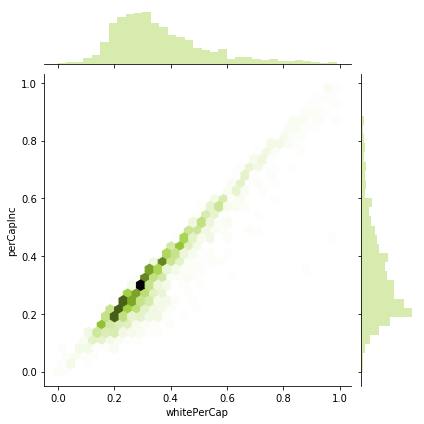

In [47]:
df_whitePerCap_cleared = df[df.whitePerCap < df.whitePerCap.quantile(0.99)]
df_perCapInc_cleared = df_whitePerCap_cleared[df_whitePerCap_cleared.perCapInc < df.perCapInc.quantile(0.99)]
sns.jointplot("whitePerCap", "perCapInc", kind = "hex", data = df_perCapInc_cleared, color="yellowgreen")

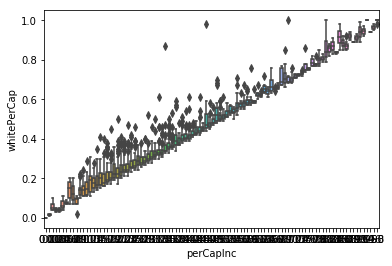

In [48]:
sns.boxplot( x=df['perCapInc'], y=df['whitePerCap'])

In [49]:
corr.unstack().tail(101).sort_values() # sprawdzamy korelację dla ViolentCrimesPerPop

ViolentCrimesPerPop  PctKids2Par           -0.738424
                     PctFam2Par            -0.706667
                     racePctWhite          -0.684770
                     PctYoungKids2Par      -0.666059
                     PctTeen2Par           -0.661582
                     pctWInvInc            -0.576324
                     PctPersOwnOccup       -0.525491
                     PctHousOwnOcc         -0.470683
                     medFamInc             -0.439108
                     medIncome             -0.424221
                     MedNumBR              -0.357385
                     perCapInc             -0.352085
                     PctOccupMgmtProf      -0.339109
                     PctEmploy             -0.331643
                     PctHousOccup          -0.319010
                     PctBSorMore           -0.314675
                     pctWWage              -0.305500
                     blackPerCap           -0.275391
                     RentLowQ              -0.

Tu zaś widzimy powiązanie pomiędzy liczbą przestępstw (**ViolentCrimesPerPop**) a odsetkiem dzieci wychowywanych przez obydwoje rodziców (**PctKids2Par**), odsetkiem dzieci nieślubnych (**PctIlleg**) czy odsetkiem osób rasy czarnej (**racepctblack**).

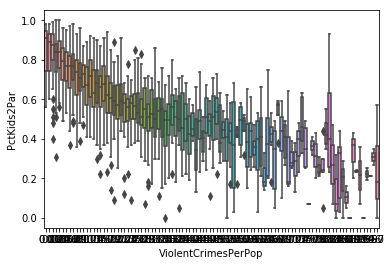

In [50]:
sns.boxplot( x=df['ViolentCrimesPerPop'], y=df['PctKids2Par'])

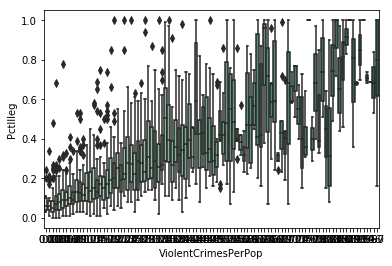

In [51]:
sns.boxplot( x=df['ViolentCrimesPerPop'], y=df['PctIlleg'], palette="ch:2.5,-.2,dark=.3")

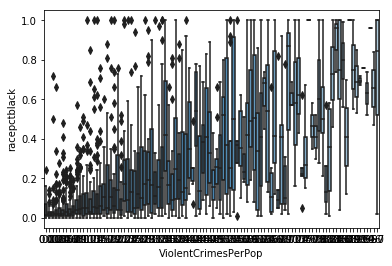

In [52]:
sns.boxplot( x=df['ViolentCrimesPerPop'], y=df['racepctblack'], palette="Blues_d")

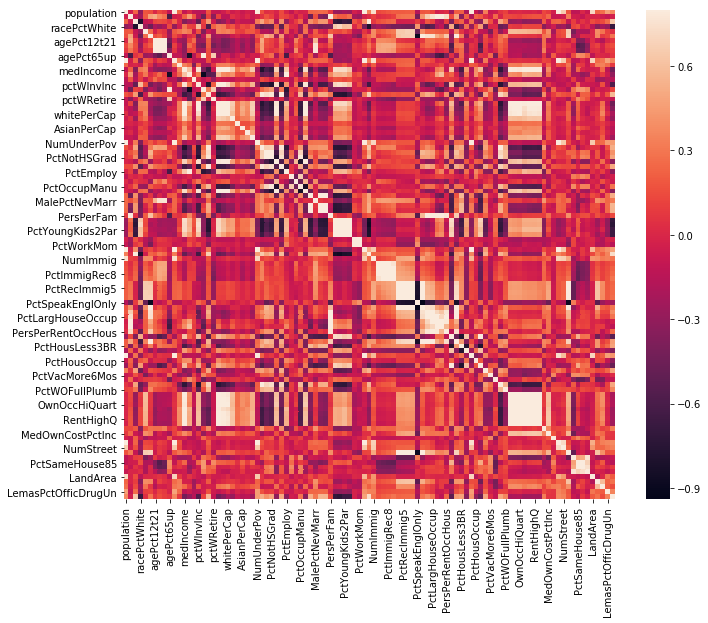

In [53]:
fig = plt.figure(figsize = (11, 9))
sns.heatmap(corr, vmax = 0.8)
plt.show()

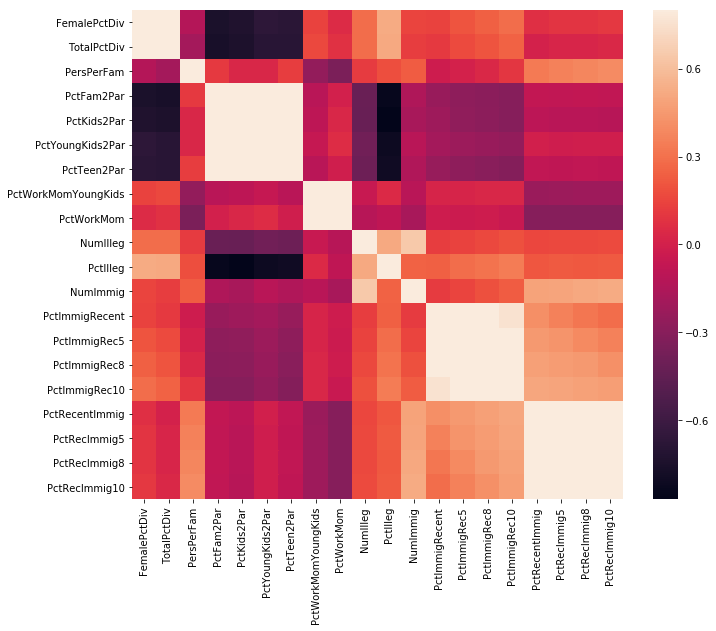

In [54]:
fig = plt.figure(figsize = (11, 9))
part = df.iloc[:,40:60].corr()
sns.heatmap(part, vmax = 0.8)
plt.show()

Co ciekawe, jest silna korelacja pomiędzy odsetkiem dzieci (**PctKids2Par**, **PctYoungKids2Par**) czy nastolatków (**PctTeen2Par**) wychowywanych przez obydwoje rodziców a odsetkiem rozwiedzonych kobiet (**FemalePctDiv**) czy osób (**TotalPctDiv**) czy osób, które nigdy nie były zamężne (**PctIlleg**).

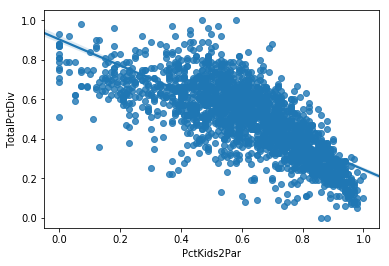

In [55]:
sns.regplot(df.PctKids2Par, df.TotalPctDiv)

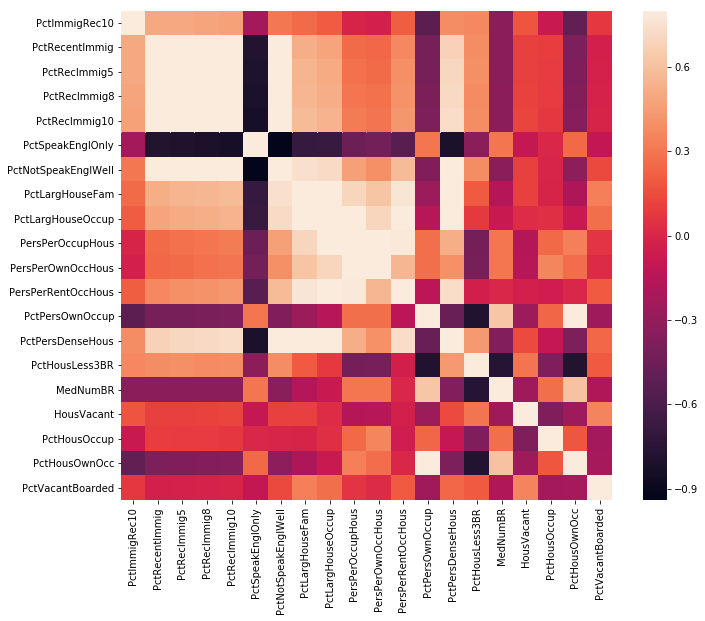

In [56]:
fig = plt.figure(figsize = (11, 9))
corr = df.iloc[:,55:75].corr()
sns.heatmap(corr, vmax = 0.8)
plt.show()

Niektóre informacje są raczej oczywiste, np. korelacja pomiędzy odsetkiem osób mówiących tylko po angielsku (**PctSpeakEnglOnly**) a odsetkiem populacji imigrantów (**PctRecImmig5**, **PctRecImmig8**, **PctRecImmig10**).

Istnieje też korelacja pomiędzy odsetkiem osób mówiących tylko po angielsku (**PctSpeakEnglOnly**) a odsetkiem populacji imigrantów (**PctRecImmig5**, **PctRecImmig8**, **PctRecImmig10**).

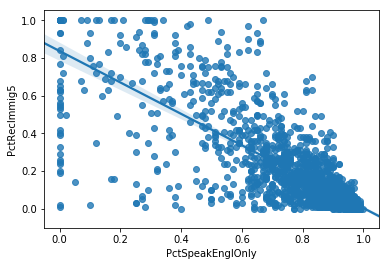

In [57]:
sns.regplot(df.PctSpeakEnglOnly, df.PctRecImmig5)

In [58]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

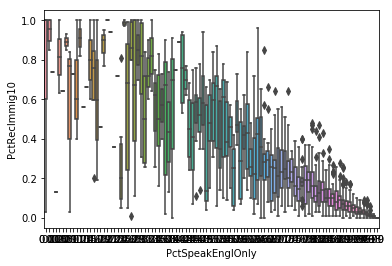

In [59]:
sns.boxplot(x="PctSpeakEnglOnly", y = "PctRecImmig10", data = df) # im mniej osób mówiących po angielsku, tym więcej imigrantów

## Regresja liniowa
Celem jest obliczenie zmiennej **ViolentCrimesPerPop** (liczbę przestępstw kryminalnychna 100 tys. populacji).

In [60]:
import sklearn.model_selection

In [61]:
# podział na zbiór trenujący/testowy
r_train, r_test = sklearn.model_selection.train_test_split(df, test_size = 0.1, random_state=42)

In [62]:
r_train.shape

(1794, 101)

In [63]:
r_test.shape

(200, 101)

Zakładamy w naszym przypadku, że liczba przestępstw będzie funkcją liniową odsetku imigrantów (**PctIlleg**). Tzn. im większy odsetek imigrantów, tym większa liczba przestępstw (**ViolentCrimesPerPop**).

Jeżeli zależność jest liniowa powinniśmy być w stanie narysować prostą przebiegającą możliwie blisko wszystkich naszych obserwacji.

### Praktyka w sklearn

In [64]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

In [65]:
regressor = LinearRegression()

X_train = r_train[['PctIlleg']]
X_test = r_test[['PctIlleg']]

y_train = r_train.ViolentCrimesPerPop
y_test = r_test.ViolentCrimesPerPop

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

baseline_RMSE = math.sqrt(mean_squared_error(y_pred, y_test))

print('Baseline test RMSE: ', baseline_RMSE)

Baseline test RMSE:  0.14577106304718196


In [66]:
def evaluate_regression(column_name):
    # narysujmy wykres danej cechy w funkcji ceny
    #sns.regplot(r_train[column_name], r_train.ViolentCrimesPerPop, color="indigo")

    # jakie RMSE uzyskamy dla tej cechy?
    regressor = LinearRegression()
    
    # w ten sposób podajemy kolumny jako listę wartości do naszego modelu
    # niestety nie akceptuje on pd.Series więc konwertujemy ją do listy
    X_train = r_train[column_name].values.reshape(-1, 1)
    y_train = r_train.ViolentCrimesPerPop.values.reshape(-1, 1)
    
    # właściwe trenowanie modelu
    regressor.fit(X_train,y_train)
    
    # otrzymane wartości współczynników kierunkowych
    print('a =', regressor.coef_)
    print('b =', regressor.intercept_)
    
    # obliczanie RMSE dla zbioru testowego i trenującego
    h_train = regressor.predict(X_train)
    X_test = r_test[column_name].values.reshape(-1, 1)
    y_test = r_test.ViolentCrimesPerPop.values.reshape(-1, 1)
    h_test = regressor.predict(X_test)
    
    print('train RMSE = ', math.sqrt(mean_squared_error(h_train, y_train)))
    print('test RMSE = ', math.sqrt(mean_squared_error(h_test, y_test)))
    print('baseline RMSE = ', baseline_RMSE)
    
    return regressor

- **PctIlleg** - odsetek dzieci nieślubnych.
- **racepctblack** - odsetek osób rasy czarnej.
- **FemalePctDiv** - odsetek rozwiedzionych kobiet.
- **PctUnemployed** - odsetek osób bezrobotnych.

In [67]:
evaluate_regression('PctIlleg')

a = [[0.74594654]]
b = [0.05276242]
train RMSE =  0.15841824656887998
test RMSE =  0.14577106304718196
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
evaluate_regression('racepctblack')

a = [[0.57368297]]
b = [0.13707797]
train RMSE =  0.18310134486753746
test RMSE =  0.15719932243345575
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
evaluate_regression('FemalePctDiv')

a = [[0.73976428]]
b = [-0.12151515]
train RMSE =  0.19498071057862915
test RMSE =  0.18077668523226328
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
evaluate_regression('PctUnemployed')

a = [[0.57812419]]
b = [0.03005586]
train RMSE =  0.20280662675110336
test RMSE =  0.18574826715839757
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

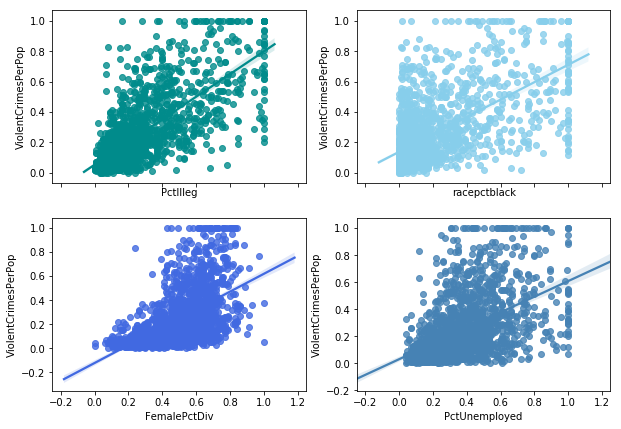

In [71]:
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
sns.regplot(r_train.PctIlleg, r_train.ViolentCrimesPerPop, color='darkcyan', ax=axes[0, 0])
sns.regplot(r_train.racepctblack, r_train.ViolentCrimesPerPop, color='skyblue', ax=axes[0, 1])
sns.regplot(r_train.FemalePctDiv, r_train.ViolentCrimesPerPop, color='royalblue', ax=axes[1, 0])
sns.regplot(r_train.PctUnemployed, r_train.ViolentCrimesPerPop, color='steelblue', ax=axes[1, 1])

- **PctKids2Par** - odsetek dzieci wychowywanych przez 2 rodziców.
- **racePctWhite** - odsetek osób rasy kaukaskiej.

In [72]:
evaluate_regression('PctKids2Par')

a = [[-0.83649646]]
b = [0.75785712]
train RMSE =  0.15844389916776944
test RMSE =  0.14420013295247738
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
evaluate_regression('racePctWhite')

a = [[-0.64769502]]
b = [0.72755117]
train RMSE =  0.17193659743551543
test RMSE =  0.14881426877926993
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

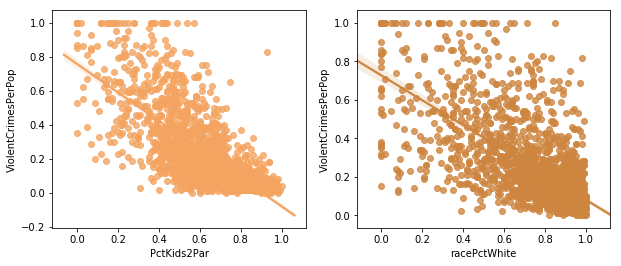

In [74]:
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.regplot(r_train.PctKids2Par, r_train.ViolentCrimesPerPop, color='sandybrown', ax=axes[0])
sns.regplot(r_train.racePctWhite, r_train.ViolentCrimesPerPop, color='peru', ax=axes[1])

## Regresja wielu zmiennych

In [75]:
def evaluate_multi_regression(features):
    label = ['ViolentCrimesPerPop']

    regressor = LinearRegression()
    X_train = r_train[features]
    y_train = r_train[label].values.reshape(-1, 1)

    X_test = r_test[features]
    y_test = r_test[label].values.reshape(-1, 1)
    regressor.fit(X_train,y_train)

    h_train = regressor.predict(X_train)
    h_test = regressor.predict(X_test)
    print('a1, a2  =', regressor.coef_[0])
    print('b=', regressor.intercept_)

    h_train = regressor.predict(X_train)
    print('RMSE train: ', math.sqrt(sklearn.metrics.mean_squared_error(h_train,y_train)))
    print('RMSE test: ', math.sqrt(sklearn.metrics.mean_squared_error(h_test,y_test)))
    print('baseline RMSE: ', baseline_RMSE)

In [76]:
features_1 = ['PctIlleg', 'racepctblack', 'FemalePctDiv', 'PctUnemployed', 'PctHousNoPhone']
evaluate_multi_regression(features_1)

a1, a2  = [ 0.49469758  0.09777976  0.30207277  0.11305043 -0.01966778]
b= [-0.08570714]
RMSE train:  0.15016409331015299
RMSE test:  0.13451298814318377
baseline RMSE:  0.14577106304718196


In [77]:
features_2 = ['PctKids2Par', 'PctFam2Par', 'racePctWhite', 'PctYoungKids2Par']
evaluate_multi_regression(features_2)

a1, a2  = [-0.73319766  0.13863807 -0.29212149  0.00693675]
b= [0.82446582]
RMSE train:  0.14919391613057462
RMSE test:  0.12866459899030594
baseline RMSE:  0.14577106304718196


In [78]:
evaluate_multi_regression(features_1 + features_2)

a1, a2  = [ 0.29098003 -0.0289216   0.20419353  0.02299168 -0.06440252 -0.77218729
  0.46596387 -0.19031569 -0.01029651]
b= [0.42484806]
RMSE train:  0.1457125271636574
RMSE test:  0.12687203939917988
baseline RMSE:  0.14577106304718196


In [79]:
evaluate_multi_regression(features_1 + features_2 + ['MalePctNevMarr', 'PctSpeakEnglOnly'])

a1, a2  = [ 0.26983954  0.10535359  0.20105827 -0.00823659 -0.06233379 -0.62002203
  0.30696582 -0.05914154 -0.03296068 -0.03767702 -0.13955959]
b= [0.4631421]
RMSE train:  0.14470832567859804
RMSE test:  0.12631946478390063
baseline RMSE:  0.14577106304718196


In [80]:
evaluate_multi_regression(['PctIlleg', 'PctKids2Par', 'racePctWhite']) # regresja trzech zmiennych

a1, a2  = [ 0.20828186 -0.44306918 -0.22893573]
b= [0.63412917]
RMSE train:  0.14791913957027505
RMSE test:  0.13012597316275362
baseline RMSE:  0.14577106304718196


## PCA - Principal Component Analysis

In [81]:
df = pd.read_pickle('files/dataframe.pkl')

In [82]:
from sklearn.preprocessing import StandardScaler
features = ['PctKids2Par', 'PctFam2Par', 'racePctWhite', 'PctYoungKids2Par']
x = df.loc[:, features].values
y = df.loc[:,['ViolentCrimesPerPop']].values
x = StandardScaler().fit_transform(x) # średnia = 0, odchylenie standardowe = 1

In [83]:
scaled_x = pd.DataFrame.from_records(x)
scaled_x.columns = features
scaled_x

,PctKids2Par,PctFam2Par,racePctWhite,PctYoungKids2Par
0,-0.148603,-0.301684,0.599578,-0.247067
1,-0.730275,-0.895963,-0.056219,-0.292792
2,-0.875693,-0.945486,-0.793990,-1.070133
3,-0.390966,0.193548,-2.761379,0.758903
4,1.402524,1.481151,0.804514,1.033258
5,0.336124,0.044978,-0.875964,0.941807
6,0.917797,0.787826,0.927476,0.575999
7,-0.924166,-0.796916,-1.203862,-1.481666
8,-0.342493,-0.499777,0.353654,-0.384244
9,0.530015,0.193548,0.476616,0.530274


In [84]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(x)

In [85]:
pca.components_

array([[-5.33316755e-01, -5.26099566e-01, -4.19905017e-01,
        -5.12320469e-01],
       [ 1.35611967e-01,  2.59169716e-01, -8.97995934e-01,
         3.28700099e-01],
       [-4.01026363e-01, -4.46659498e-01,  1.00942666e-01,
         7.93400105e-01],
       [-7.32366363e-01,  6.75681581e-01,  8.42238510e-02,
        -5.04668168e-04]])

In [86]:
pca.explained_variance_ratio_

array([0.85481542, 0.1228421 , 0.01963885, 0.00270362])

In [87]:
pca.explained_variance_ratio_.cumsum()

array([0.85481542, 0.97765753, 0.99729638, 1.        ])

In [88]:
data = pca.explained_variance_ratio_.cumsum()[::-1]

In [89]:
data

array([1.        , 0.99729638, 0.97765753, 0.85481542])

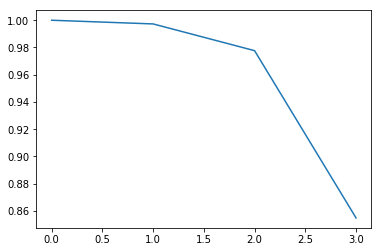

In [90]:
sns.lineplot(y =data, x = list(range(len(data))))

In [91]:
x[0]

array([-0.14860259, -0.30168421,  0.59957757, -0.24706658])

In [92]:
principalComponents[0]

array([ 0.11277982, -0.71796873,  0.05884398, -0.0443875 ])

In [93]:
pca.transform([x[0]])

array([[ 0.11277982, -0.71796873,  0.05884398, -0.0443875 ]])

In [94]:
np.dot( pca.components_, x[0])

array([ 0.11277982, -0.71796873,  0.05884398, -0.0443875 ])

In [95]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['ViolentCrimesPerPop']]], axis = 1)

In [96]:
pca.explained_variance_ratio_.cumsum() # skumulowana wariancja tłumaczona przez komponenty

array([0.85481542, 0.97765753])

In [97]:
finalDf

,principal component 1,principal component 2,ViolentCrimesPerPop
0,0.112780,-0.717969,0.20
1,1.034443,-0.376997,0.67
2,1.846092,-0.002549,0.43
3,0.877398,2.726300,0.12
4,-2.394401,0.191250,0.03
5,-0.317609,1.153424,0.14
6,-1.588499,-0.314893,0.03
7,2.176726,0.262175,0.55
8,0.493945,-0.619854,0.53
9,-0.856295,-0.131660,0.15


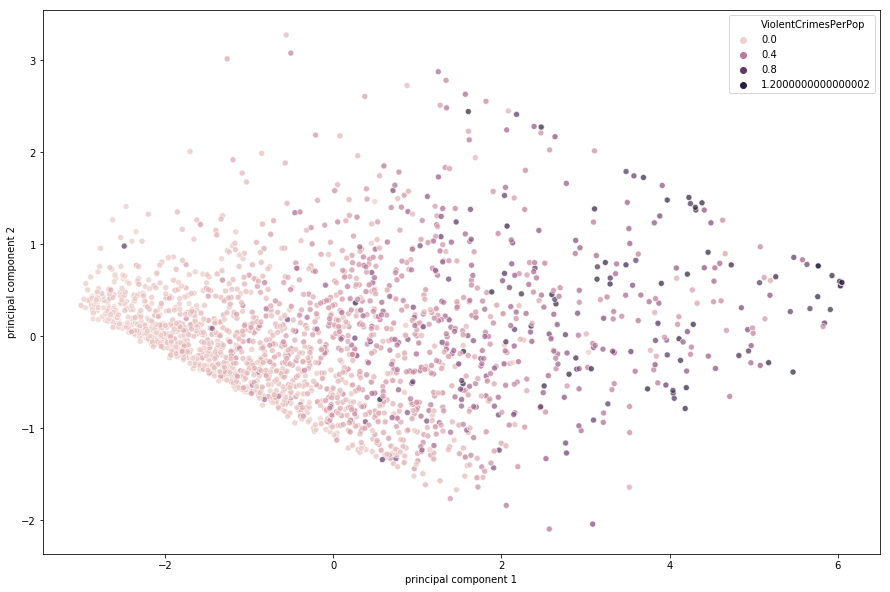

In [98]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data = finalDf, x = 'principal component 1', y = 'principal component 2', hue='ViolentCrimesPerPop', alpha=0.7, legend="brief")

### Włączenie PCA i t-SNE na tych samych danych

In [99]:
from sklearn.manifold import TSNE

scaled_df = StandardScaler().fit_transform(df)
X_tsne = TSNE(learning_rate=100, verbose=1, perplexity=40, n_iter=300).fit_transform(scaled_df)
X_pca = PCA().fit_transform(scaled_df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1994 samples in 0.008s...
[t-SNE] Computed neighbors for 1994 samples in 1.275s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1994
[t-SNE] Computed conditional probabilities for sample 1994 / 1994
[t-SNE] Mean sigma: 2.807084
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.264465
[t-SNE] KL divergence after 300 iterations: 1.622918


### t-SNE

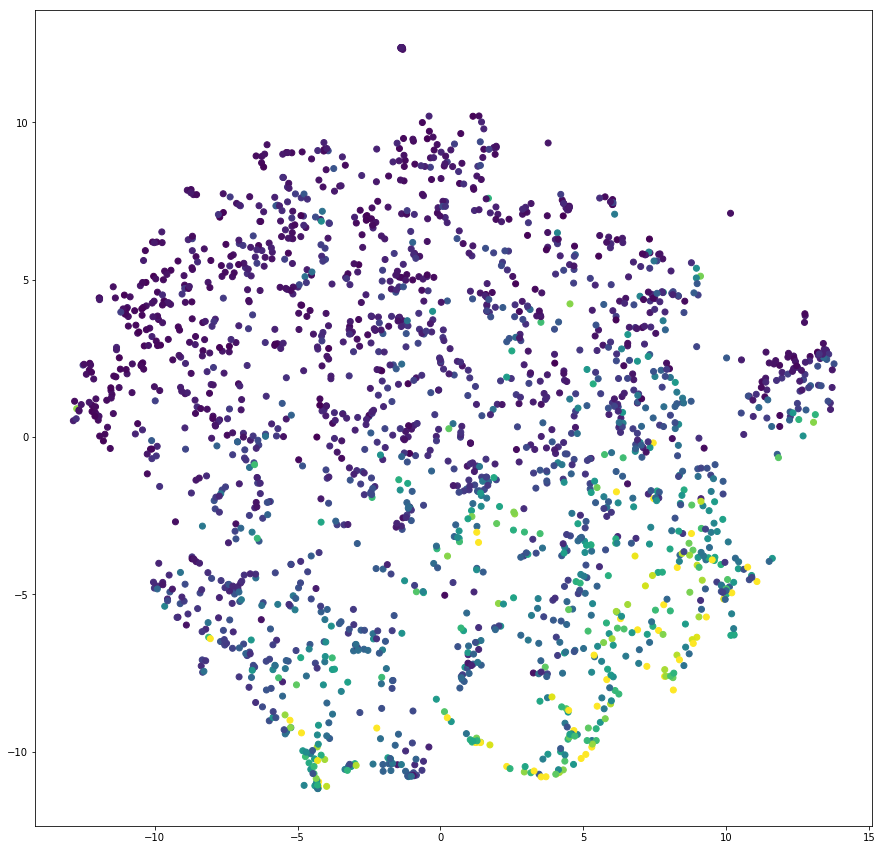

In [100]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df.ViolentCrimesPerPop)

### PCA

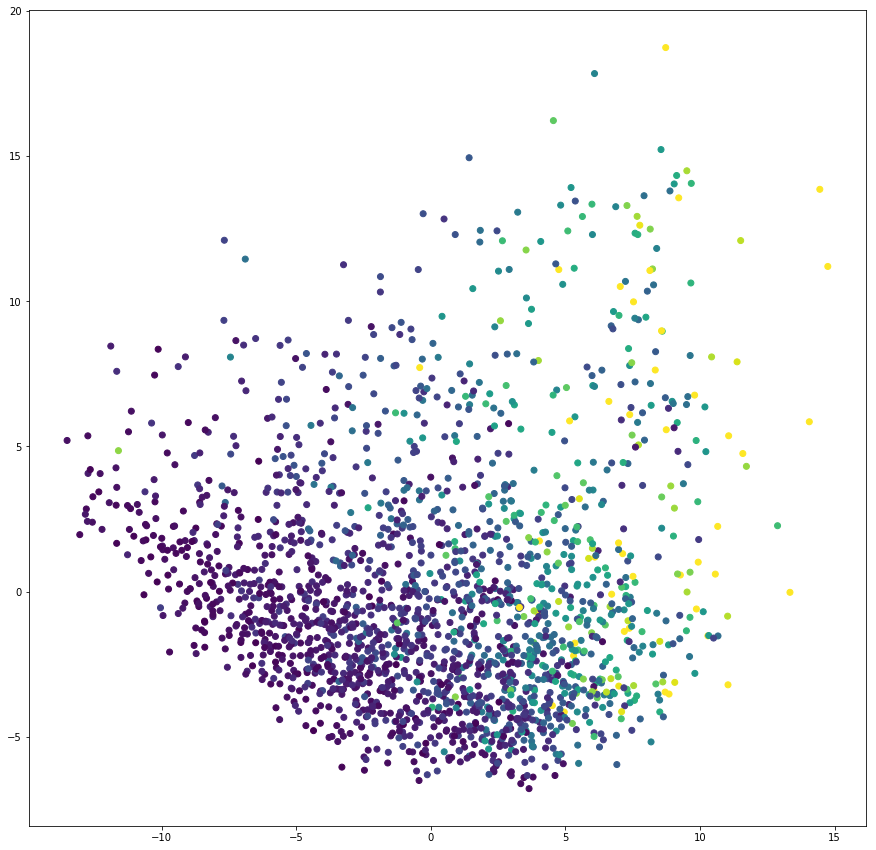

In [101]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df.ViolentCrimesPerPop, label=df.ViolentCrimesPerPop)